# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install wordcloud
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Load Dataset and Inspect

In [2]:
df = pd.read_csv('../Datasets/New/balanced_priority_task_dataset_missing_values.csv')

In [3]:
df

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours
0,TASK_89951,Schedule meeting with stakeholders next week.,Medium,2025-08-01,user_37,In Progress,2025-05-26,7.97,6.90
1,TASK_83109,Task needs completion before end of the day.,High,2025-07-11,user_67,To Do,2025-06-13,12.73,14.89
2,TASK_49771,Critical bug in production impacting all users.,Critical,2025-07-01,user_76,Completed,2025-06-08,14.14,12.29
3,TASK_69966,Prepare for upcoming product launch this week.,High,2025-08-07,user_52,To Do,2025-05-24,13.88,17.28
4,TASK_24871,Client report must be submitted by evening.,High,2025-06-29,user_73,To Do,2025-06-05,12.74,14.07
...,...,...,...,...,...,...,...,...,...
9995,TASK_57874,Refactor legacy module as per guidelines.,Medium,2025-07-31,user_55,In Progress,2025-05-28,11.00,14.53
9996,TASK_80498,Coordinate with design team on layout feedback.,Medium,2025-08-02,user_32,In Progress,2025-06-11,9.09,9.04
9997,TASK_64514,Complete documentation for current sprint.,Medium,2025-08-17,NaN,To Do,2025-06-15,6.03,4.42
9998,TASK_91703,Critical bug in production impacting all users.,Critical,2025-07-28,user_13,Completed,2025-06-05,4.70,5.87


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   task_id           10000 non-null  object 
 1   task_description  9500 non-null   object 
 2   priority          9500 non-null   object 
 3   deadline          10000 non-null  object 
 4   assigned_to       9500 non-null   object 
 5   status            9500 non-null   object 
 6   created_at        10000 non-null  object 
 7   estimated_hours   10000 non-null  float64
 8   actual_hours      10000 non-null  float64
dtypes: float64(2), object(7)
memory usage: 703.3+ KB


In [5]:
df.describe(include='all', datetime_is_numeric=True)

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours
count,10000,9500,9500,10000,9500,9500,10000,10000.000000,10000.000000
unique,10000,20,4,60,100,3,30,NaN,NaN
top,TASK_89951,Schedule meeting with stakeholders next week.,Critical,2025-07-05,user_31,In Progress,2025-05-25,NaN,NaN
freq,1,520,2384,199,123,3259,371,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.968163,9.971691
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.050000,4.375631
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.040000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.440000,6.530000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.910000,9.970000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.460000,13.450000


# Retrieving the first and last 10 rows

In [6]:
df.head(10)

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours
0,TASK_89951,Schedule meeting with stakeholders next week.,Medium,2025-08-01,user_37,In Progress,2025-05-26,7.97,6.90
1,TASK_83109,Task needs completion before end of the day.,High,2025-07-11,user_67,To Do,2025-06-13,12.73,14.89
2,TASK_49771,Critical bug in production impacting all users.,Critical,2025-07-01,user_76,Completed,2025-06-08,14.14,12.29
3,TASK_69966,Prepare for upcoming product launch this week.,High,2025-08-07,user_52,To Do,2025-05-24,13.88,17.28
4,TASK_24871,Client report must be submitted by evening.,High,2025-06-29,user_73,To Do,2025-06-05,12.74,14.07
5,TASK_17314,Schedule meeting with stakeholders next week.,Medium,2025-07-13,user_43,To Do,2025-05-26,2.42,2.78
6,TASK_55654,Emergency: Security breach needs to be fixed A...,Critical,2025-08-15,user_33,To Do,2025-05-30,14.44,17.96
7,TASK_59958,Complete documentation for current sprint.,Medium,2025-08-12,user_4,In Progress,2025-05-31,2.46,3.50
8,TASK_56790,Complete documentation for current sprint.,Medium,2025-08-17,user_75,Completed,2025-06-07,7.44,9.59
9,TASK_20622,Critical bug in production impacting all users.,NaN,2025-06-23,user_69,In Progress,2025-05-26,6.85,5.31


In [7]:
df.tail(10)

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours
9990,TASK_67489,Organize code comments and improve readability.,NaN,2025-08-07,user_88,In Progress,2025-05-27,8.36,10.92
9991,TASK_50095,Coordinate with design team on layout feedback.,Medium,2025-08-01,user_53,Completed,2025-05-25,10.60,10.62
9992,TASK_36468,Database optimization needed before backup.,High,2025-07-18,user_15,In Progress,2025-06-02,10.19,11.15
9993,TASK_69169,URGENT: System failure requires immediate atte...,Critical,2025-08-02,user_51,Completed,2025-05-26,6.04,5.72
9994,TASK_87633,Refactor legacy module as per guidelines.,Medium,2025-07-16,user_51,To Do,2025-06-08,9.15,8.17
9995,TASK_57874,Refactor legacy module as per guidelines.,Medium,2025-07-31,user_55,In Progress,2025-05-28,11.00,14.53
9996,TASK_80498,Coordinate with design team on layout feedback.,Medium,2025-08-02,user_32,In Progress,2025-06-11,9.09,9.04
9997,TASK_64514,Complete documentation for current sprint.,Medium,2025-08-17,NaN,To Do,2025-06-15,6.03,4.42
9998,TASK_91703,Critical bug in production impacting all users.,Critical,2025-07-28,user_13,Completed,2025-06-05,4.70,5.87
9999,TASK_33427,Conduct mid-cycle review of project progress.,Medium,2025-08-10,user_43,To Do,2025-06-15,11.27,10.01


### we got to know that some missing and invalid entries lies in the dataset.

### Cleaning the dataset

## 1. Handle Missing Values

In [8]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 task_id               0
task_description    500
priority            500
deadline              0
assigned_to         500
status              500
created_at            0
estimated_hours       0
actual_hours          0
dtype: int64


In [9]:
df.drop_duplicates(inplace=True)
df['task_description'].fillna("No description provided", inplace=True)
df['priority'].fillna(df['priority'].mode()[0], inplace=True)
df['assigned_to'].fillna("unassigned", inplace=True)
df['status'].fillna(df['status'].mode()[0], inplace=True)

In [10]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 task_id             0
task_description    0
priority            0
deadline            0
assigned_to         0
status              0
created_at          0
estimated_hours     0
actual_hours        0
dtype: int64


## 2. Fixing Date Columns

In [11]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['deadline'] = pd.to_datetime(df['deadline'])

In [12]:
df.head()

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours
0,TASK_89951,Schedule meeting with stakeholders next week.,Medium,2025-08-01,user_37,In Progress,2025-05-26,7.97,6.90
1,TASK_83109,Task needs completion before end of the day.,High,2025-07-11,user_67,To Do,2025-06-13,12.73,14.89
2,TASK_49771,Critical bug in production impacting all users.,Critical,2025-07-01,user_76,Completed,2025-06-08,14.14,12.29
3,TASK_69966,Prepare for upcoming product launch this week.,High,2025-08-07,user_52,To Do,2025-05-24,13.88,17.28
4,TASK_24871,Client report must be submitted by evening.,High,2025-06-29,user_73,To Do,2025-06-05,12.74,14.07


## 3. Feature Engineering

In [13]:
df['days_to_deadline'] = (df['deadline'] - df['created_at']).dt.days
df['on_time'] = (df['actual_hours'] <= df['estimated_hours']).astype(int)

In [14]:
df

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,days_to_deadline,on_time
0,TASK_89951,Schedule meeting with stakeholders next week.,Medium,2025-08-01,user_37,In Progress,2025-05-26,7.97,6.90,67,1
1,TASK_83109,Task needs completion before end of the day.,High,2025-07-11,user_67,To Do,2025-06-13,12.73,14.89,28,0
2,TASK_49771,Critical bug in production impacting all users.,Critical,2025-07-01,user_76,Completed,2025-06-08,14.14,12.29,23,1
3,TASK_69966,Prepare for upcoming product launch this week.,High,2025-08-07,user_52,To Do,2025-05-24,13.88,17.28,75,0
4,TASK_24871,Client report must be submitted by evening.,High,2025-06-29,user_73,To Do,2025-06-05,12.74,14.07,24,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,TASK_57874,Refactor legacy module as per guidelines.,Medium,2025-07-31,user_55,In Progress,2025-05-28,11.00,14.53,64,0
9996,TASK_80498,Coordinate with design team on layout feedback.,Medium,2025-08-02,user_32,In Progress,2025-06-11,9.09,9.04,52,1
9997,TASK_64514,Complete documentation for current sprint.,Medium,2025-08-17,unassigned,To Do,2025-06-15,6.03,4.42,63,1
9998,TASK_91703,Critical bug in production impacting all users.,Critical,2025-07-28,user_13,Completed,2025-06-05,4.70,5.87,53,0


In [15]:
df['created_dayofweek'] = df['created_at'].dt.dayofweek
df

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,days_to_deadline,on_time,created_dayofweek
0,TASK_89951,Schedule meeting with stakeholders next week.,Medium,2025-08-01,user_37,In Progress,2025-05-26,7.97,6.90,67,1,0
1,TASK_83109,Task needs completion before end of the day.,High,2025-07-11,user_67,To Do,2025-06-13,12.73,14.89,28,0,4
2,TASK_49771,Critical bug in production impacting all users.,Critical,2025-07-01,user_76,Completed,2025-06-08,14.14,12.29,23,1,6
3,TASK_69966,Prepare for upcoming product launch this week.,High,2025-08-07,user_52,To Do,2025-05-24,13.88,17.28,75,0,5
4,TASK_24871,Client report must be submitted by evening.,High,2025-06-29,user_73,To Do,2025-06-05,12.74,14.07,24,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TASK_57874,Refactor legacy module as per guidelines.,Medium,2025-07-31,user_55,In Progress,2025-05-28,11.00,14.53,64,0,2
9996,TASK_80498,Coordinate with design team on layout feedback.,Medium,2025-08-02,user_32,In Progress,2025-06-11,9.09,9.04,52,1,2
9997,TASK_64514,Complete documentation for current sprint.,Medium,2025-08-17,unassigned,To Do,2025-06-15,6.03,4.42,63,1,6
9998,TASK_91703,Critical bug in production impacting all users.,Critical,2025-07-28,user_13,Completed,2025-06-05,4.70,5.87,53,0,3


### Ordinal Encode Priority

In [16]:
from sklearn.preprocessing import LabelEncoder

priority_le = LabelEncoder()
df['priority_encoded'] = priority_le.fit_transform(df['priority'])
df[['priority','priority_encoded']].head(12)

,priority,priority_encoded
0,Medium,3
1,High,1
2,Critical,0
3,High,1
4,High,1
5,Medium,3
6,Critical,0
7,Medium,3
8,Medium,3
9,Critical,0


### Encode Status

In [17]:
from sklearn.preprocessing import LabelEncoder

status_le = LabelEncoder()
df['status_encoded'] = status_le.fit_transform(df['status'])
df[['status','status_encoded']].head(12)

,status,status_encoded
0,In Progress,1
1,To Do,2
2,Completed,0
3,To Do,2
4,To Do,2
5,To Do,2
6,To Do,2
7,In Progress,1
8,Completed,0
9,In Progress,1


### One-hot for Assigned_to (if exists)

In [18]:
if 'assigned_to' in df.columns:
    df = df.join(pd.get_dummies(df['assigned_to'], prefix='assigned'))
df.head(5)

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,days_to_deadline,...,assigned_user_90,assigned_user_91,assigned_user_92,assigned_user_93,assigned_user_94,assigned_user_95,assigned_user_96,assigned_user_97,assigned_user_98,assigned_user_99
0,TASK_89951,Schedule meeting with stakeholders next week.,Medium,2025-08-01,user_37,In Progress,2025-05-26,7.97,6.90,67,...,0,0,0,0,0,0,0,0,0,0
1,TASK_83109,Task needs completion before end of the day.,High,2025-07-11,user_67,To Do,2025-06-13,12.73,14.89,28,...,0,0,0,0,0,0,0,0,0,0
2,TASK_49771,Critical bug in production impacting all users.,Critical,2025-07-01,user_76,Completed,2025-06-08,14.14,12.29,23,...,0,0,0,0,0,0,0,0,0,0
3,TASK_69966,Prepare for upcoming product launch this week.,High,2025-08-07,user_52,To Do,2025-05-24,13.88,17.28,75,...,0,0,0,0,0,0,0,0,0,0
4,TASK_24871,Client report must be submitted by evening.,High,2025-06-29,user_73,To Do,2025-06-05,12.74,14.07,24,...,0,0,0,0,0,0,0,0,0,0


# EDA Visualizations

### 1. Priority Distribution

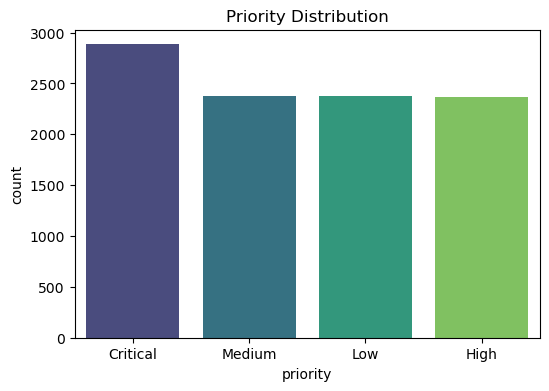

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'priority', order = df['priority'].value_counts().index, palette = 'viridis')
plt.title("Priority Distribution")
plt.show()

### 2. Task Status Distribution

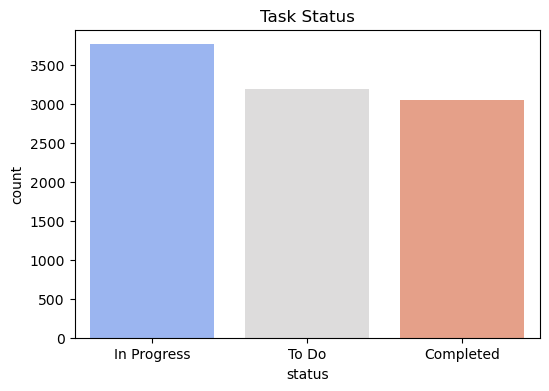

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'status', order = df['status'].value_counts().index, palette = 'coolwarm')
plt.title("Task Status")
plt.show()

### 3. Tasks per User (Top 10)

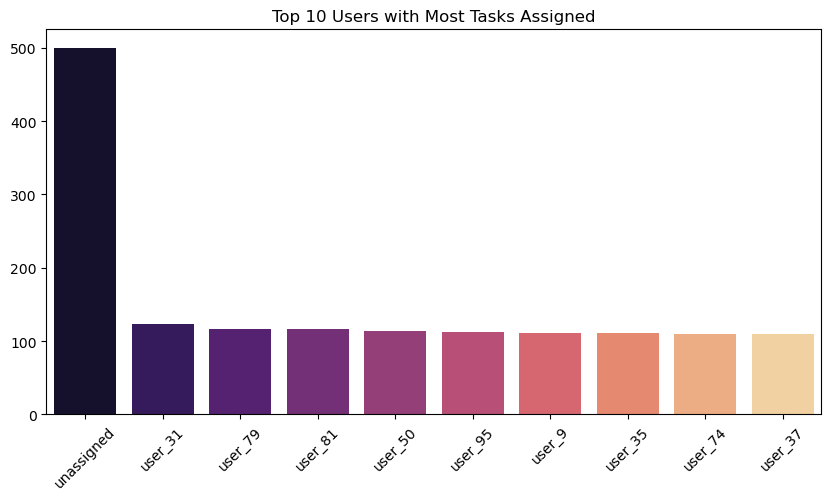

In [21]:
plt.figure(figsize = (10, 5))
top_users = df['assigned_to'].value_counts().head(10)
sns.barplot(x = top_users.index, y = top_users.values, palette = 'magma')
plt.xticks(rotation = 45)
plt.title("Top 10 Users with Most Tasks Assigned")
plt.show()

### 4. Word Cloud of Task Descriptions

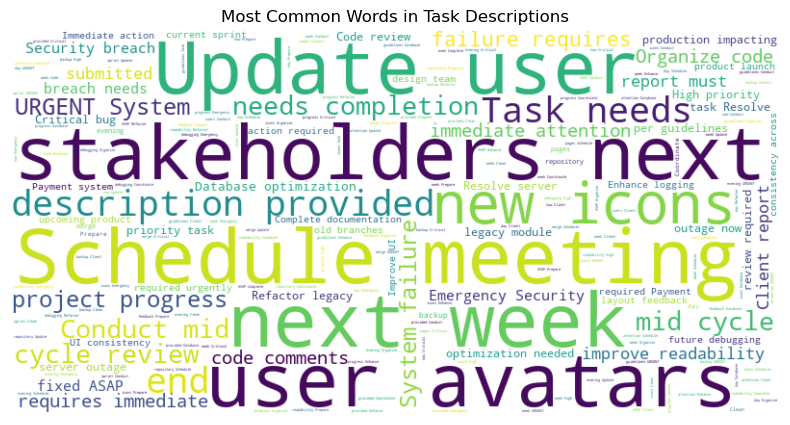

In [22]:
text = " ".join(df['task_description'].dropna().values)
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title("Most Common Words in Task Descriptions")
plt.show()

### 5. Correlation Heatmap

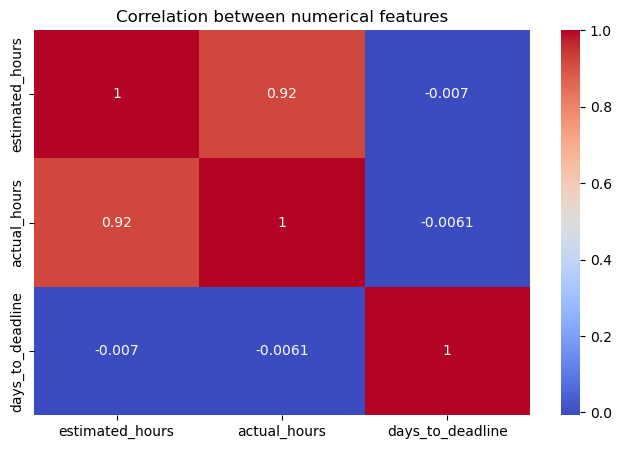

In [23]:
plt.figure(figsize = (8, 5))
sns.heatmap(df[['estimated_hours', 'actual_hours', 'days_to_deadline']].corr(), annot = True, cmap = "coolwarm")
plt.title('Correlation between numerical features')
plt.show()

## Univariate Analysis

### 6. Estimated Hours Distribution

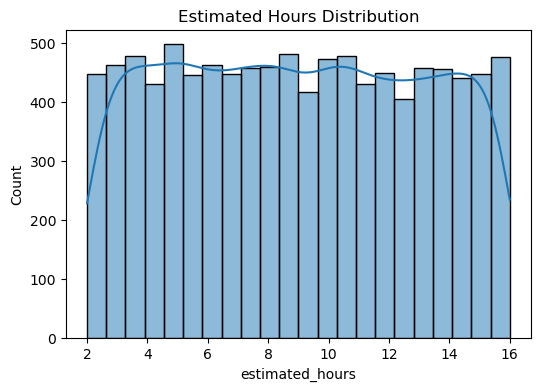

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(df['estimated_hours'], kde=True)
plt.title("Estimated Hours Distribution")
plt.show()

### 7. Estimated Hours by Priority

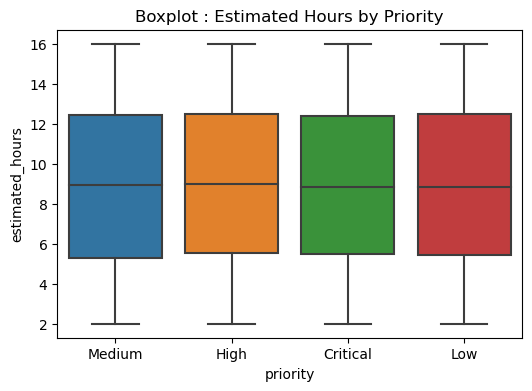

In [25]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'priority', y = 'estimated_hours', data = df)
plt.title('Boxplot : Estimated Hours by Priority')
plt.show()

## Bivariate Analysis

### 8. Estimated vs Actual Hours by Priority

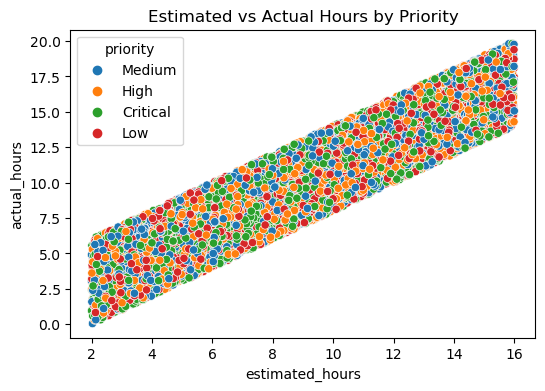

In [26]:
plt.figure(figsize = (6, 4))
sns.scatterplot(x = 'estimated_hours', y = 'actual_hours', hue = 'priority', data = df)
plt.title('Estimated vs Actual Hours by Priority')
plt.show()

### 9. Correlation Matrix

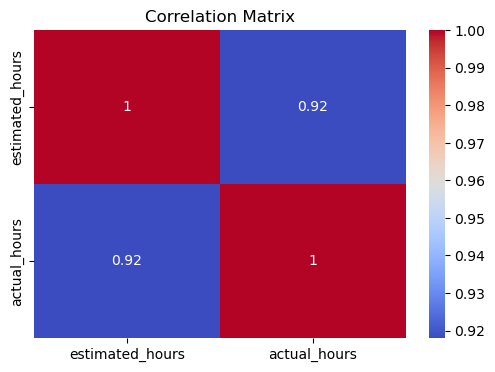

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['estimated_hours', 'actual_hours']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Multivariate Analysis

### 10. Pair Plot of Numerical Features

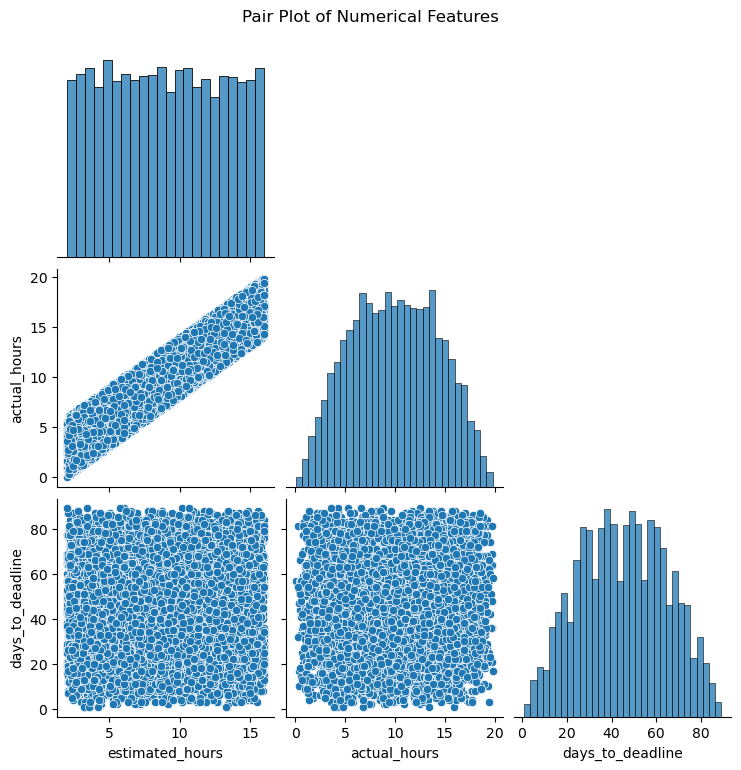

In [28]:
sns.pairplot(df[['estimated_hours', 'actual_hours', 'days_to_deadline']], corner=True)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

### 12. Extended Correlation Matrix

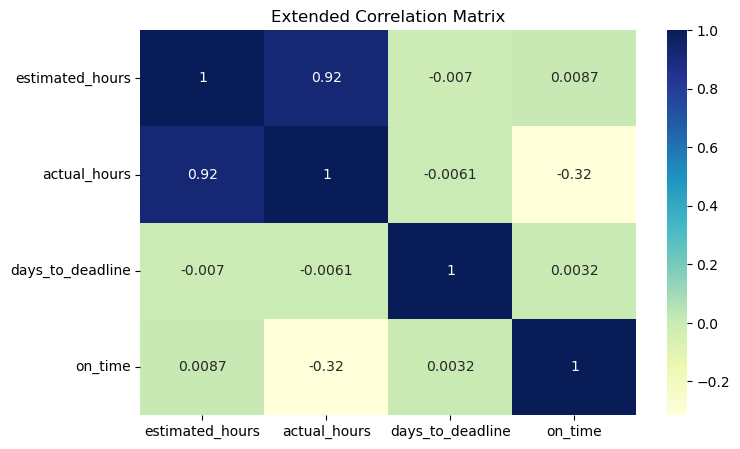

In [29]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['estimated_hours', 'actual_hours', 'days_to_deadline', 'on_time']].corr(), annot=True, cmap="YlGnBu")
plt.title("Extended Correlation Matrix")
plt.show()

# NLP Processing

## Importing Libraries

In [30]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
df.head(10)

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,days_to_deadline,...,assigned_user_90,assigned_user_91,assigned_user_92,assigned_user_93,assigned_user_94,assigned_user_95,assigned_user_96,assigned_user_97,assigned_user_98,assigned_user_99
0,TASK_89951,Schedule meeting with stakeholders next week.,Medium,2025-08-01,user_37,In Progress,2025-05-26,7.97,6.90,67,...,0,0,0,0,0,0,0,0,0,0
1,TASK_83109,Task needs completion before end of the day.,High,2025-07-11,user_67,To Do,2025-06-13,12.73,14.89,28,...,0,0,0,0,0,0,0,0,0,0
2,TASK_49771,Critical bug in production impacting all users.,Critical,2025-07-01,user_76,Completed,2025-06-08,14.14,12.29,23,...,0,0,0,0,0,0,0,0,0,0
3,TASK_69966,Prepare for upcoming product launch this week.,High,2025-08-07,user_52,To Do,2025-05-24,13.88,17.28,75,...,0,0,0,0,0,0,0,0,0,0
4,TASK_24871,Client report must be submitted by evening.,High,2025-06-29,user_73,To Do,2025-06-05,12.74,14.07,24,...,0,0,0,0,0,0,0,0,0,0
5,TASK_17314,Schedule meeting with stakeholders next week.,Medium,2025-07-13,user_43,To Do,2025-05-26,2.42,2.78,48,...,0,0,0,0,0,0,0,0,0,0
6,TASK_55654,Emergency: Security breach needs to be fixed A...,Critical,2025-08-15,user_33,To Do,2025-05-30,14.44,17.96,77,...,0,0,0,0,0,0,0,0,0,0
7,TASK_59958,Complete documentation for current sprint.,Medium,2025-08-12,user_4,In Progress,2025-05-31,2.46,3.50,73,...,0,0,0,0,0,0,0,0,0,0
8,TASK_56790,Complete documentation for current sprint.,Medium,2025-08-17,user_75,Completed,2025-06-07,7.44,9.59,71,...,0,0,0,0,0,0,0,0,0,0
9,TASK_20622,Critical bug in production impacting all users.,Critical,2025-06-23,user_69,In Progress,2025-05-26,6.85,5.31,28,...,0,0,0,0,0,0,0,0,0,0


## Initializing Tools

In [32]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [33]:
stemmer

<PorterStemmer>

## Preprocessing to task_description column

In [34]:
def preprocess_text(text):
    # 1. Normalize: Lowercase & remove punctuation
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    # 2. Tokenize
    tokens = nltk.word_tokenize(text)
    
    # 3. Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # 4. Apply Stemming
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Return Joined and cleaned Text
    return " ".join(stemmed_tokens)

df['cleaned_description'] = df['task_description'].astype(str).apply(preprocess_text)

In [35]:
df[['task_description', 'cleaned_description']].head(10)

,task_description,cleaned_description
0,Schedule meeting with stakeholders next week.,schedul meet stakehold next week
1,Task needs completion before end of the day.,task need complet end day
2,Critical bug in production impacting all users.,critic bug product impact user
3,Prepare for upcoming product launch this week.,prepar upcom product launch week
4,Client report must be submitted by evening.,client report must submit even
5,Schedule meeting with stakeholders next week.,schedul meet stakehold next week
6,Emergency: Security breach needs to be fixed A...,emerg secur breach need fix asap
7,Complete documentation for current sprint.,complet document current sprint
8,Complete documentation for current sprint.,complet document current sprint
9,Critical bug in production impacting all users.,critic bug product impact user


## Done with NLP preprocessing on Task Description

### Retrieving the Dataset

In [36]:
df.head(5)

,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,days_to_deadline,...,assigned_user_91,assigned_user_92,assigned_user_93,assigned_user_94,assigned_user_95,assigned_user_96,assigned_user_97,assigned_user_98,assigned_user_99,cleaned_description
0,TASK_89951,Schedule meeting with stakeholders next week.,Medium,2025-08-01,user_37,In Progress,2025-05-26,7.97,6.90,67,...,0,0,0,0,0,0,0,0,0,schedul meet stakehold next week
1,TASK_83109,Task needs completion before end of the day.,High,2025-07-11,user_67,To Do,2025-06-13,12.73,14.89,28,...,0,0,0,0,0,0,0,0,0,task need complet end day
2,TASK_49771,Critical bug in production impacting all users.,Critical,2025-07-01,user_76,Completed,2025-06-08,14.14,12.29,23,...,0,0,0,0,0,0,0,0,0,critic bug product impact user
3,TASK_69966,Prepare for upcoming product launch this week.,High,2025-08-07,user_52,To Do,2025-05-24,13.88,17.28,75,...,0,0,0,0,0,0,0,0,0,prepar upcom product launch week
4,TASK_24871,Client report must be submitted by evening.,High,2025-06-29,user_73,To Do,2025-06-05,12.74,14.07,24,...,0,0,0,0,0,0,0,0,0,client report must submit even


# Feature Extraction using TF-IDF

##### TF-IDF : TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used in NLP to reflect the importance of a word to a document in a collection or corpus. It's a technique that converts text into numerical vectors by multiplying term frequency (TF) with inverse document frequency (IDF).

##### How TF-IDF Works:
       Term Frequency (TF): Measures how often a term appears in a document. 
       Formula: TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d) 
       Inverse Document Frequency (IDF): Measures how important a term is across the entire corpus. 
       Formula: IDF(t) = log\_e (Total number of documents / Number of documents with term t in it) 
##### TF-IDF: The product of TF and IDF, indicating the term's importance within a specific document relative to the entire corpus. 
##### Formula: TF-IDF(t, d) = TF(t, d) * IDF(t) 

### Importing Libraries

In [37]:
!pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import nltk
import pandas as pd

## 1. TF-IDF Implementation

In [38]:
# Using Cleaned Text
descriptions = df['cleaned_description'].fillna("")

# Initialize and TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features = 300)
x_tfidf = tfidf.fit_transform(descriptions)

#convert to dataframe
tfidf_df = pd.DataFrame(x_tfidf.toarray(), columns = tfidf.get_feature_names_out())


tfidf_df.head()

,across,action,asap,attent,avatar,backup,branch,breach,bug,clean,...,submit,system,task,team,ui,upcom,updat,urgent,user,week
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.387024
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.420327,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.478932,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.391789,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.479393,0.0,0.0,0.000000,0.390772
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.447214,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


#### TF (Term Frequency): Counts how often a word appears.

#### IDF (Inverse Document Frequency): Penalizes common words.

#### TF-IDF highlights important but unique words.

## 2. Word2Vec Embedding

#### Each word is mapped to a vector using word context (semantic meaning).

In [39]:
# Tokenize descriptions for Word2Vec
tokenized_text = descriptions.apply(nltk.word_tokenize)


# Train Word2Vec model
w2v_model = Word2Vec(sentences = tokenized_text, vector_size = 100, window = 5, min_count = 2, workers = 4)


# Function to convert description to vector (mean of word vectors)
def get_vector(doc):
    if not doc:
        return np.zeroes(100)
    
    vectors = [w2v_model.wv[word] for word in doc if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)


# Apply on entire dataset
df['w2v_vector'] = tokenized_text.apply(get_vector)


# Example: view first vector
print("Vector shape:", df['w2v_vector'][0].shape)
print(df['w2v_vector'][0])

Vector shape: (100,)
[-0.18857814  0.581093   -0.15273504 -0.3067413   0.42550617 -0.6244165
 -0.34118408  0.6935886  -0.17695718 -0.42437124 -0.24980895 -0.93143415
 -0.65343016  0.17526624  0.10551069  0.1721716  -0.03176651  0.3401957
 -0.06104112 -0.729955    0.47321326  0.6098219   0.04168006 -0.06527296
 -0.15104964  0.50099814 -0.14485076 -0.3356909  -0.08782347 -0.07099596
 -0.19438076 -0.4327248   0.23832783 -0.7401265  -0.2984131   0.16648746
  0.33244777  0.06898119 -0.45826665 -0.17745477  0.20727018 -0.31158268
  0.01644844  0.50180024  0.41012445  0.20265372 -0.71027887 -0.54267967
  0.67819834  0.12210751  0.04197322 -0.31169578  0.12303142 -0.11822817
 -0.2473584  -0.00759073  0.6018746  -0.3002381   0.00290044  0.3344932
  0.36066526  0.03899866  0.27279884  0.40719253  0.29336435  0.5694033
  0.02908095  0.67003304 -0.11206684  0.44064847 -0.19452345 -0.08183891
  0.38138127 -0.0346528   0.4744146   0.10018708  0.41440216  0.05028657
  0.07562225 -0.34983546 -0.556264

## 3. BERT Embedding (Transformer-Based Model)
#### BERT gives context-aware embeddings using pre-trained deep models.

In [40]:
from sentence_transformers import SentenceTransformer

# Load pre-trained BERT model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate BERT embeddings for each task description
bert_embeddings = bert_model.encode(descriptions.tolist(), show_progress_bar=True)

# Convert to DataFrame
bert_df = pd.DataFrame(bert_embeddings)
print("BERT Embedding shape:", bert_df.shape)
print(bert_df.head(10))

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

BERT Embedding shape: (10000, 384)
        0         1         2         3         4         5         6    \
0 -0.019386 -0.009914  0.014687  0.020925 -0.045759  0.009883 -0.100212   
1 -0.026931  0.062177 -0.000577 -0.025987 -0.023387 -0.009375  0.025666   
2 -0.078956 -0.008128  0.012743 -0.011326  0.033460  0.089023  0.111672   
3 -0.076132 -0.050725  0.025362 -0.104046  0.018840  0.112805 -0.015512   
4 -0.009331  0.073658 -0.033682  0.038696 -0.029098  0.021194 -0.088259   
5 -0.019386 -0.009914  0.014687  0.020925 -0.045759  0.009883 -0.100212   
6 -0.126031  0.037631  0.088762 -0.045717 -0.003521 -0.027115  0.012368   
7 -0.037791  0.069693 -0.026616 -0.037375  0.021013  0.036688 -0.040806   
8 -0.037791  0.069693 -0.026616 -0.037375  0.021013  0.036688 -0.040806   
9 -0.078956 -0.008128  0.012743 -0.011326  0.033460  0.089023  0.111672   

        7         8         9    ...       374       375       376       377  \
0 -0.050103 -0.006472  0.000229  ...  0.024944  0.093701  0

## Task Classification using Naive Bayes and SVM

### Importing Libraries

In [41]:
from sklearn.model_selection import train_test_split

### check for encoded columns

In [42]:
df.columns

Index(['task_id', 'task_description', 'priority', 'deadline', 'assigned_to',
       'status', 'created_at', 'estimated_hours', 'actual_hours',
       'days_to_deadline',
       ...
       'assigned_user_92', 'assigned_user_93', 'assigned_user_94',
       'assigned_user_95', 'assigned_user_96', 'assigned_user_97',
       'assigned_user_98', 'assigned_user_99', 'cleaned_description',
       'w2v_vector'],
      dtype='object', length=117)

In [43]:
columns_without_user = [col for col in df.columns if 'assigned_user' not in col]
columns_without_user

['task_id',
 'task_description',
 'priority',
 'deadline',
 'assigned_to',
 'status',
 'created_at',
 'estimated_hours',
 'actual_hours',
 'days_to_deadline',
 'on_time',
 'created_dayofweek',
 'priority_encoded',
 'status_encoded',
 'assigned_unassigned',
 'cleaned_description',
 'w2v_vector']

### Features for task classification

In [44]:
X = x_tfidf
y = df['priority_encoded']
z = df['status_encoded']

# check for missing values in the features
y.isnull().sum()

0

In [45]:
from sklearn.preprocessing import LabelEncoder

priority_label_encoder = LabelEncoder()
df['priority_encoded'] = priority_label_encoder.fit_transform(df['priority'])

status_label_encoder = LabelEncoder()
df['status_encoded'] = status_label_encoder.fit_transform(df['status'])

priority_label_encoder.classes_

array(['Critical', 'High', 'Low', 'Medium'], dtype=object)

### Train Test Split for X and Y Features

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Naive Bayes Classification and SVM Classfication for priority column

In [47]:
# Naive bayes Classification

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)
priority_accuracy = accuracy_score(y_test, y_pred_nb)

# Evaluate
print("Naive Bayes Results:\n")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb, target_names=priority_label_encoder.classes_))
print(f"Accuracy: {priority_accuracy * 100:.2f}%\n")



# SVM Classification


from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Train model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)
priority_svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Evaluate
print("SVM Results:\n")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=priority_label_encoder.classes_))
print(f"Accuracy : {priority_svm_accuracy * 100:.2f}%\n")

Naive Bayes Results:

[[478  19  62  14]
 [  0 468  18   0]
 [  0   0 475   0]
 [  0   0  23 443]]
              precision    recall  f1-score   support

    Critical       1.00      0.83      0.91       573
        High       0.96      0.96      0.96       486
         Low       0.82      1.00      0.90       475
      Medium       0.97      0.95      0.96       466

    accuracy                           0.93      2000
   macro avg       0.94      0.94      0.93      2000
weighted avg       0.94      0.93      0.93      2000

Accuracy: 93.20%

SVM Results:

[[478  19  62  14]
 [  0 468  18   0]
 [  0   0 475   0]
 [  0   0  23 443]]
              precision    recall  f1-score   support

    Critical       1.00      0.83      0.91       573
        High       0.96      0.96      0.96       486
         Low       0.82      1.00      0.90       475
      Medium       0.97      0.95      0.96       466

    accuracy                           0.93      2000
   macro avg       0.94      0.

### Train Test Split for X and Z features

In [48]:
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

### Naive Bayes Classification and SVM Classfication for Status Variable

In [49]:
# Naive bayes Classification

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train model
nb_model = MultinomialNB()
nb_model.fit(X_train, z_train)

# Predict
z_pred_nb = nb_model.predict(X_test)
priority_accuracy = accuracy_score(z_test, z_pred_nb)

# Evaluate
print("Naive Bayes Results:\n")
print(confusion_matrix(z_test, z_pred_nb))
print(classification_report(z_test, z_pred_nb, target_names=status_label_encoder.classes_))
print(f"Accuracy: {priority_accuracy * 100:.2f}%\n")



# SVM Classification


from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Train model
svm_model = LinearSVC()
svm_model.fit(X_train, z_train)

# Predict
z_pred_svm = svm_model.predict(X_test)
priority_svm_accuracy = accuracy_score(z_test, z_pred_svm)

# Evaluate
print("SVM Results:\n")
print(confusion_matrix(z_test, z_pred_svm))
print(classification_report(z_test, z_pred_svm, target_names=status_label_encoder.classes_))
print(f"Accuracy : {priority_svm_accuracy * 100:.2f}%\n")

Naive Bayes Results:

[[ 35 493  98]
 [ 36 590 139]
 [ 27 467 115]]
              precision    recall  f1-score   support

   Completed       0.36      0.06      0.10       626
 In Progress       0.38      0.77      0.51       765
       To Do       0.33      0.19      0.24       609

    accuracy                           0.37      2000
   macro avg       0.35      0.34      0.28      2000
weighted avg       0.36      0.37      0.30      2000

Accuracy: 37.00%

SVM Results:

[[ 35 545  46]
 [ 36 665  64]
 [ 27 531  51]]
              precision    recall  f1-score   support

   Completed       0.36      0.06      0.10       626
 In Progress       0.38      0.87      0.53       765
       To Do       0.32      0.08      0.13       609

    accuracy                           0.38      2000
   macro avg       0.35      0.34      0.25      2000
weighted avg       0.35      0.38      0.27      2000

Accuracy : 37.55%



## Overall Results till now

| Metrics  | Naive Bayes | SVM    | Target Variable |
| -------- | ----------- | ------ | --------------- |
| Accuracy | 93.20%      | 93.20% | Priority        |
| Accuracy | 37.00%      | 37.55% | Status          |